# Monsoon Model
### Modified Zickfeld model, Saha 2017

### *This notebook has the function builds as well as scratch work cells*

In [1]:
import numpy as np
import matplotlib.pyplot as plt
from scipy import integrate

In [2]:
%load_ext autoreload
%autoreload 2

### Model Inputs / boundary conditions

1. Temperature, T_side(day)
2. Sp. humidity, q_side(day)
3. Wind, u_side(day)
4. Insolation, insol(day) <-- prescribed as a function of lat

### Read inputs

In [3]:
label = 'INAS'
label = 'INBMY'
# label = 'INMID'

input_path = '_inputFiles/' + label + '/input_'

input_file_T_N = input_path + 'T_N.dat'
input_file_T_E = input_path + 'T_E.dat'
input_file_T_S = input_path + 'T_S.dat'
input_file_T_W = input_path + 'T_W.dat'

input_file_qs_N = input_path + 'qs_N.dat'
input_file_qs_E = input_path + 'qs_E.dat'
input_file_qs_S = input_path + 'qs_S.dat'
input_file_qs_W = input_path + 'qs_W.dat'

input_file_u_N = input_path + 'u_N.dat'
input_file_u_E = input_path + 'u_E.dat'
input_file_u_S = input_path + 'u_S.dat'
input_file_u_W = input_path + 'u_W.dat'

T_side = np.zeros((1827, 4))
qs_side = np.zeros((1827, 4))
u_side = np.zeros((1827, 4))

T_side[:,0] = np.loadtxt(fname = input_file_T_N)
T_side[:,1] = np.loadtxt(fname = input_file_T_E)
T_side[:,2] = np.loadtxt(fname = input_file_T_S)
T_side[:,3] = np.loadtxt(fname = input_file_T_W)

qs_side[:,0] = np.loadtxt(fname = input_file_qs_N)
qs_side[:,1] = np.loadtxt(fname = input_file_qs_E)
qs_side[:,2] = np.loadtxt(fname = input_file_qs_S)
qs_side[:,3] = np.loadtxt(fname = input_file_qs_W)

u_side[:,0] = np.loadtxt(fname = input_file_u_N)
u_side[:,1] = np.loadtxt(fname = input_file_u_E)
u_side[:,2] = np.loadtxt(fname = input_file_u_S)
u_side[:,3] = np.loadtxt(fname = input_file_u_W)


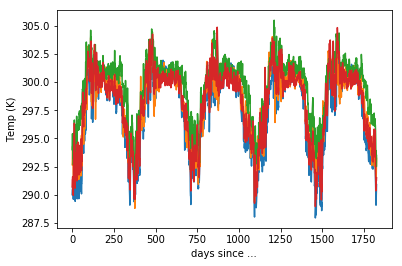

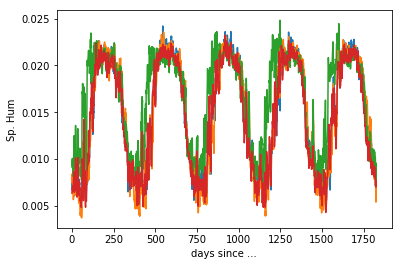

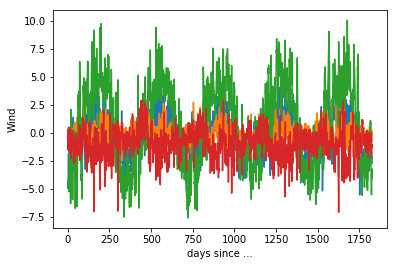

In [4]:
# plot inputs

for i in range(0, 4):
    plt.plot(T_side[:,i])
    
plt.xlabel('days since ...')
plt.ylabel('Temp (K)')
plt.show()

for i in range(0, 4):
    plt.plot(qs_side[:,i])
    
plt.xlabel('days since ...')
plt.ylabel('Sp. Hum')
plt.show()

for i in range(0, 4):
    plt.plot(u_side[:,i])
    
plt.xlabel('days since ...')
plt.ylabel('Wind')
plt.show()

In [5]:
# read insoaltion
# should be specific to the center of each box. currently there is only one insolation input file

input_file_insol = input_path + 'insol.dat'

# insol = np.zeros((1827, 1))

insol = np.loadtxt(fname = input_file_insol)

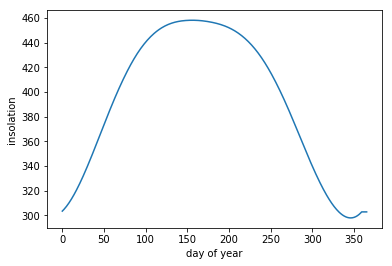

In [6]:
plt.plot(insol)
    
plt.xlabel('day of year')
plt.ylabel('insolation')
plt.show()

## Functions to Read Inputs

In [45]:
print (u_side[:,0])

u_side[:,0] = -u_side[:,0]

print (u_side[:,0])

[-4.50999  4.51499  4.68499 ... -2.25499 -2.32999 -2.75499]
[ 4.50999 -4.51499 -4.68499 ...  2.25499  2.32999  2.75499]


In [46]:
def read_inputs(label):
    
#     label = 'INAS'
#     label = 'INBMY'
#     # label = 'INMID'

    input_path = '_inputFiles/' + label + '/input_'

    input_file_T_N = input_path + 'T_N.dat'
    input_file_T_E = input_path + 'T_E.dat'
    input_file_T_S = input_path + 'T_S.dat'
    input_file_T_W = input_path + 'T_W.dat'

    input_file_qs_N = input_path + 'qs_N.dat'
    input_file_qs_E = input_path + 'qs_E.dat'
    input_file_qs_S = input_path + 'qs_S.dat'
    input_file_qs_W = input_path + 'qs_W.dat'

    input_file_u_N = input_path + 'u_N.dat'
    input_file_u_E = input_path + 'u_E.dat'
    input_file_u_S = input_path + 'u_S.dat'
    input_file_u_W = input_path + 'u_W.dat'

    T_side = np.zeros((1827, 4))
    qs_side = np.zeros((1827, 4))
    u_side = np.zeros((1827, 4))

    T_side[:,0] = np.loadtxt(fname = input_file_T_N)
    T_side[:,1] = np.loadtxt(fname = input_file_T_E)
    T_side[:,2] = np.loadtxt(fname = input_file_T_S)
    T_side[:,3] = np.loadtxt(fname = input_file_T_W)

    qs_side[:,0] = np.loadtxt(fname = input_file_qs_N)
    qs_side[:,1] = np.loadtxt(fname = input_file_qs_E)
    qs_side[:,2] = np.loadtxt(fname = input_file_qs_S)
    qs_side[:,3] = np.loadtxt(fname = input_file_qs_W)

    u_side[:,0] = np.loadtxt(fname = input_file_u_N)
    u_side[:,1] = np.loadtxt(fname = input_file_u_E)
    u_side[:,2] = np.loadtxt(fname = input_file_u_S)
    u_side[:,3] = np.loadtxt(fname = input_file_u_W)

    # Flip sign of N and E Wind inputs    
    u_side[:,0] = -u_side[:,0]
    u_side[:,1] = -u_side[:,1]
    
    return T_side, qs_side, u_side


## Functions

In [7]:
def Tz(z, Ta, qa, Ncu):
    return (Ta - (gamma0 + gamma1*(Ta-T0)*(1-aq*qa**2) - gamma2*Ncu)*z)

def qz(z, qa):
    return (qa*np.exp(-z/He))

def rho(z):
    return (rho0*np.exp(-z/H0))

def p(z):
    return (p0*np.exp(-z/H0))

def qsat(z, Ta, qa, Ncu):
    return (qsat0*(p0/p(z))*np.exp(-((0.622*L/R)*(1/Tz(z,Ta,qa,Ncu)-1/T0))))

### Run-time Functions

In [8]:
def u_vert(t_day):
    
    return width * integrate.quad(rho,0,H_mon)[0] * np.sum(u_side[t_day,:])/(A_g*rho(np.mean([H_Had, H_mon])))

In [9]:
def adv_heat_side(i, t_day, Ta, qa, u0_p, u1_p, u0_m, u1_m, Ncu):
    
    return (Cair * width * ( \
                            + integrate.quad(lambda z: u0_p[i]*rho(z)*Tz(z, T_side[t_day,i], qa, Ncu), 0, H_mon  )[0] \
                            - integrate.quad(lambda z: u1_p[i]*rho(z)*Tz(z, Ta, qa, Ncu), H_mon, H_trop)[0] \
                            - integrate.quad(lambda z: u0_m[i]*rho(z)*Tz(z, Ta, qa, Ncu), 0, H_mon  )[0] \
                            + integrate.quad(lambda z: u1_m[i]*rho(z)*Tz(z, T_side[t_day,i], qa, Ncu), H_mon, H_trop)[0] \
                          ))

In [10]:
def adv_q_side(i, t_day, Ta, qa, u0_p, u1_p, u0_m, u1_m, Ncu):
    
    return (width * ( \
                            + integrate.quad(lambda z: u0_p[i]*rho(z)*qz(z, qs_side[t_day,i]), 0, H_mon  )[0] \
                            - integrate.quad(lambda z: u1_p[i]*rho(z)*qz(z, qa), H_mon, H_trop)[0] \
                            - integrate.quad(lambda z: u0_m[i]*rho(z)*qz(z, qa), 0, H_mon  )[0] \
                            + integrate.quad(lambda z: u1_m[i]*rho(z)*qz(z, qs_side[t_day,i]), H_mon, H_trop)[0] \
                          ))

In [11]:
def clouds(v, qa, Ta):
    
    # ========================================== CLOUD COVERAGE AND ALBEDOS
    # ------------------------------------------------------ cumulus clouds
    if (v>0):    # upward velocity
        Ncu = Ncu0 * np.tanh(v/a1cu) * np.tanh(qa/a2cu)
    else: # downward velocity
        Ncu = 0 

    # ------------------------------------------------------ stratus clouds
    Nst   = (qa/qsat(0,Ta,qa,Ncu))**(1.5) * (a1st+a2st*(1+np.tanh(v/a3st)))

    # --------------------------------------------------------- total cloud
    N    = 1 - (1-Ncu)*(1-Nst)

    # --------------------------------------------------------- clear sky
    Ncs  = 1 - N
    
    return Ncu, Nst, N, Ncs

### Solving Routine using Euler's Scheme

In [14]:
# Euler's scheme to solve the monsoon ODEs

def solve_monsoon_ODEs_euler(Ta, qa, w, w2, T_side, qs_side, u_side, insol):
    
    Ta_arr       = []
    qa_arr       = []
    w_arr        = []
    P_mmpday_arr = []

    ## //////////////////////////////////////////////////////////// TIME LOOP
    ## //////////////////////////////////////////////////////////////////////
    t = dt

    while (t<dur_sim):

        # current time
        t_day         = int(np.floor(t/sec_day))
        t_months      = int(np.floor(t/sec_month))
        t_day_of_year = int(np.remainder(np.ceil(t/sec_day),365)+1)

        # <<<<<<<<<<<<<<<<<<<<<<<<<<<<<<<<<<<<<<<<<<<<<<<<< READ INPUT VARIABLES 
        # INPUTS: Temperature, Sp Hum, Wind, and Insolation


#         # Wind inputs    
#         u_side[t_day,0] = -u_side[t_day,0]
#         u_side[t_day,1] = -u_side[t_day,1]


        # Insolation input [W m^-2]
        Iin           = insol[t_day_of_year]

        # <<<<<<<<<<<<<<<<<<<<<<<<<<<<<<<<<<<<<<<<<<<<<<<<<<<<<<<<<<<<<<<<<<<<<
        # --------------------------------------------------- vertical velocity 
        v             = u_vert(t_day)

        # --------------------------------------------------- clouds
        Ncu, Nst, N, Ncs = clouds(v, qa, Ta)

        # Ncudot
        if (t<=dt):
            Ncudot = 0
        else:
            Ncudot = -(Ncu_old - Ncu)/dt


        # -------------------------------------------------------------- albedo
        # (clouds have specified albedos)


        alpha = Nst*alphast + Ncu*alphacu + Ncs*alphacs


        # ======================= FLUXES DUE TO MONSOON, HADLEY AND TRADE WINDS
        # (height change of N side due to Tibet not included)

        # ------------------------------------------------------------- monsoon 
        # (positive values imply box-ward flow)

        # u0 = surface wind
        # u1 = top wind

        # UP/DOWN-STREAM flows
        u0_p = (1/2)*(abs(u_side[t_day,:]) + u_side[t_day,:])
        u0_m = (1/2)*(abs(u_side[t_day,:]) - u_side[t_day,:])
        u1_p = k_u_mon * u0_p
        u1_m = k_u_mon * u0_m

        # heat advection, summed from all sides
        adv_heat = sum(adv_heat_side(i, t_day, Ta, qa, u0_p, u1_p, u0_m, u1_m, Ncu) for i in range(0, 4)) 

        # moisture advection, summed from all sides
        adv_q    = sum(adv_q_side(i, t_day, Ta, qa, u0_p, u1_p, u0_m, u1_m, Ncu) for i in range(0, 4)) 


        # ================================================= CONDENSATION HEIGHT
        # From the intersection of dew point and dry lapse rates
        # qaREL = 0.263*p0*qa*(exp(17.67*(Ta-T0)/(Ta-29.65)))^(-1)

        qaREL = qa/qsat(0, Ta, qa, Ncu)
        Tadew = Ta - (100-qaREL)/5

        H_c   = max((Ta-Tadew)/(Gamma_a - Gamma_dew),0)

        # ======================================================= PRECIPITATION
        if (H_c<H_trop and H_c>=0):
            # Zickfeld
            P = max((N/tau_p) * integrate.quad(lambda z: (rho(z)*qz(z,qa)), H_c, H_trop)[0], 0)
            #      P = max((N/tau_p) * quad(@(z) (rho(z).*qz(z,qa)), 0, H_trop),0)
        else:
            P = 0

        # ========================================================= EVAPORATION
        # (from ground only, only positive)
        # total surface wind:
        # usfc = abs(sum(u_side))

        usfc = np.sqrt((u_side[t_day,:][0]+u_side[t_day,:][2])**2 + (u_side[t_day,:][1]+u_side[t_day,:][3])**2)

        E  = max(k_e * w * usfc * rho0 * (qsat(0,Ta,qa,Ncu)-qa), 0)

        # =========================================================== RADIATION
        Iout  = B0 + B1*(Ta-T0) - N*(B2 + B3*(Ta-T0))

        # ================================================= GOVERNING EQUATIONS
        # MOISTURE EQ
        qdot_L      = (E-P)/(((1-np.exp((-2*H_trop)/H0))*H0*rho0)/2)
        qdot_adv    = (adv_q/A_g)/(((1-np.exp((-2*H_trop)/H0))*H0*rho0)/2)

        qadot       = qdot_L + qdot_adv

        # HEAT EQ
        RHS_HEATEQ  = A_g * (Iin*(1 - alpha) - Iout + L*(P - E)) + adv_heat

        Tadot       = (Cg*np.exp(1)**(H0**(-1)*H_trop)*m_g+A_g*Cair*H0*((-1)+(-1)* \
            gamma1*(H0+H_trop)*((-1)+aq*qa**2)+np.exp(1)**(H0**(-1)*H_trop)*( \
            1+gamma1*H0*((-1)+aq*qa**2)))*rho0)**(-1)*(np.exp(1)**(H0**(-1) \
            *H_trop)*RHS_HEATEQ+(-1)*A_g*Cair*H0*(((-1)+np.exp(1)**(H0**(-1)*H_trop) \
            )*H0+(-1)*H_trop)*rho0*(gamma2*Ncudot+2*aq*gamma1*qa*qadot* \
            ((-1)*T0+Ta)))

        # GROUND WATER EQ
        Roff  = k_Roff * P * w

        # wdot  = ((P - E - Roff)/f1) - (w-w2)/tau_w
        wdot  = ((P - E - Roff)/f1)
        # w2dot = (f1/f2) * (w-w2)/tau_w
        w2dot = 0

        # put these in a function and return some diagnostic variables.
        # =================================================== EULER INTEGRATION
        Ta = Ta + Tadot*dt
        qa = min(max(qa + qadot*dt, 1e-10),1)
        w  = min(max(w + wdot*dt, 0),1)
        w2 = min(max(w2 + w2dot*dt,0),1)

        # ============================================================== OUTPUT
        if (np.remainder(t, sec_day)==0): ## write values once every day      
            P_mmpday = P * sec_day
            E_mmpday = E * sec_day

            P_mmpday_arr.append(P_mmpday)
            Ta_arr.append(Ta)
            qa_arr.append(qa)
            w_arr.append(w)

            # 1    2   3   4  5  6    7         8         9                     10 11
            # t_day, Ta, qa, w, v, H_c, E_mmpday, P_mmpday, qsat(0,Ta,qa,Ncu)-qa, N, Ncu)


        if (np.remainder(t,sec_month)==0):
             print ('month: ', t/sec_month)

        # ====================================================== TIME INCREMENT
        t = t + dt
        Ncu_old = Ncu
    ## //////////////////////////////////////////////////////// END TIME LOOP
    ## /////////////////////////////////////////////////////////////////////



    Ta_arr = np.array(Ta_arr)
    qa_arr = np.array(qa_arr)
    w_arr  = np.array(w_arr)
    P_mmpday_arr = np.array(P_mmpday_arr)

    return Ta_arr, qa_arr, w_arr, P_mmpday_arr


## Plotting Routine

In [103]:
def plot_arrays(Ta_arr, qa_arr, w_arr, P_mmpday_arr):

    fig, axs = plt.subplots(2,2, figsize = (12,6))
    
    axs[0, 0].step(Ta_arr, 'k')
    axs[0, 0].step(T_side[0:len(Ta_arr), 0], 'red', alpha=0.5)
    axs[0, 0].step(T_side[0:len(Ta_arr), 1], 'red', alpha=0.5)
    axs[0, 0].step(T_side[0:len(Ta_arr), 2], 'red', alpha=0.5)
    axs[0, 0].step(T_side[0:len(Ta_arr), 3], 'red', alpha=0.5)
    axs[0, 0].set_title('Temperature')
    axs[0, 0].set(ylabel = 'K')

    axs[0, 1].step(qa_arr, 'purple')
    axs[0, 1].step(qs_side[0:len(Ta_arr), 0], 'red', alpha=0.5)
    axs[0, 1].step(qs_side[0:len(Ta_arr), 1], 'red', alpha=0.5)
    axs[0, 1].step(qs_side[0:len(Ta_arr), 2], 'red', alpha=0.5)
    axs[0, 1].step(qs_side[0:len(Ta_arr), 3], 'red', alpha=0.5)
    axs[0, 1].set_title('Specific Humidity')
    axs[0, 1].set(ylabel = '')
    
    axs[1, 0].step(w_arr, 'g')
    axs[1, 0].set_title('Ground Moisture')
    axs[1, 0].set(ylabel = '')

    axs[1, 1].step(P_mmpday_arr[1:], '-')
    axs[1, 1].set_title('Precipitation ')
    axs[1, 1].set(ylabel = '[mm/day]')

    for ax in axs.flat:
        ax.set(xlabel='Days')

    # Hide x labels and tick labels for top plots and y ticks for right plots.
    for ax in axs.flat:
        ax.label_outer()

### Read parameters

In [12]:
from params import *

In [13]:
dur_sim_yr

1

### Main Program

In [15]:
# IMPORT MODEL PARAMETERS
# .......................................................................
from params import *


# READ INPUTS
# .......................................................................
label = 'INAS'
T_side, qs_side, u_side = read_inputs(label)


## DEFINE INITIAL CONDITIONS
# .......................................................................
Ta = Ts
qa = 0.015
w  = 0.35        # soil moisture content [kg m^-2]
# w2 = 0.35        # soil moisture content [kg m^-2]
w2 = 0        # soil moisture content [kg m^-2]
# P  = 1.5/sec_day # [mm/day]/sec_day = [kg m^-2 s^-2]
# E  = 1.5/sec_day # [mm/day]/sec_day = [kg m^-2 s^-2]


## CALL SYSTEM SOLVER
# .......................................................................
print ('simulation length = ', dur_sim_yr, ' yr')
print ('time step = ', dt_day, ' days\n')
print ('-------------------------------')
print ('running sim over box ', label, '\n')
Ta_arr, qa_arr, w_arr, P_mmpday_arr = solve_monsoon_ODEs_euler(Ta, qa, w, w2, T_side, qs_side, u_side, insol)

print ('\ndone')



running sim over box  INBMY 

month:  1.0
month:  2.0
month:  3.0
month:  4.0
month:  5.0
month:  6.0
month:  7.0
month:  8.0
month:  9.0
month:  10.0
month:  11.0
month:  12.0

done


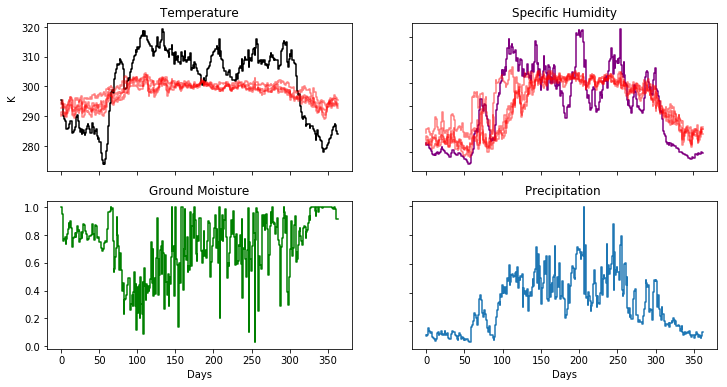

In [102]:
plot_arrays(Ta_arr, qa_arr, w_arr, P_mmpday_arr)

### Plotting Arrays

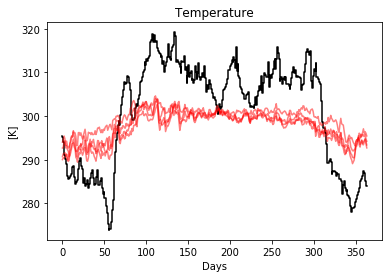

In [39]:
plt.step(Ta_arr, 'k')
plt.plot(T_side[0:len(Ta_arr), 0], 'red', alpha=0.5)
plt.plot(T_side[0:len(Ta_arr), 1], 'red', alpha=0.5)
plt.plot(T_side[0:len(Ta_arr), 2], 'red', alpha=0.5)
plt.plot(T_side[0:len(Ta_arr), 3], 'red', alpha=0.5)

plt.title('Temperature')
plt.xlabel('Days')
plt.ylabel('[K]')

plt.show()

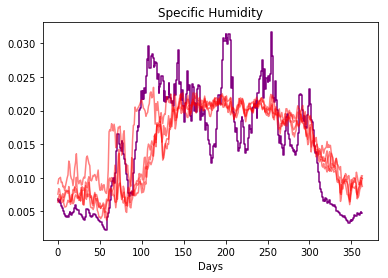

In [40]:
plt.step(qa_arr, 'purple')
plt.plot(qs_side[0:len(Ta_arr), 0], 'red', alpha=0.5)
plt.plot(qs_side[0:len(Ta_arr), 1], 'red', alpha=0.5)
plt.plot(qs_side[0:len(Ta_arr), 2], 'red', alpha=0.5)
plt.plot(qs_side[0:len(Ta_arr), 3], 'red', alpha=0.5)

plt.title('Specific Humidity')
plt.xlabel('Days')
plt.ylabel('')

plt.show()

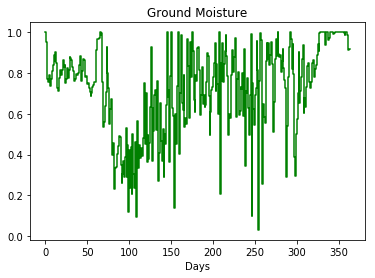

In [41]:
plt.step(w_arr, 'g')

plt.title('Ground Moisture')
plt.xlabel('Days')
plt.ylabel('')

plt.show()

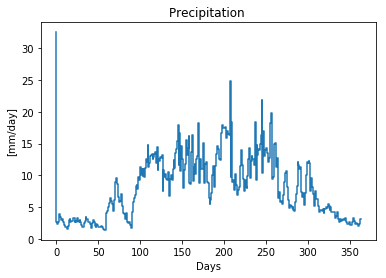

In [42]:
plt.step(P_mmpday_arr, '-')
# plt.fill_between(P_mmpday_arr)

plt.title('Precipitation ')
plt.xlabel('Days')
plt.ylabel('[mm/day]')

plt.show()

### Initial Conditions and Time Loop

In [14]:
# ## INITIAL CONDITIONS
# # .......................................................................
# Ta = Ts
# qa = 0.015
# w  = 0.35        # soil moisture content [kg m^-2]
# # w2 = 0.35        # soil moisture content [kg m^-2]
# w2 = 0        # soil moisture content [kg m^-2]
# # P  = 1.5/sec_day # [mm/day]/sec_day = [kg m^-2 s^-2]
# # E  = 1.5/sec_day # [mm/day]/sec_day = [kg m^-2 s^-2]

# Ta_arr       = []
# qa_arr       = []
# w_arr        = []
# P_mmpday_arr = []

# ## //////////////////////////////////////////////////////////// TIME LOOP
# ## //////////////////////////////////////////////////////////////////////
# t = dt

# print ('running sim over box ', label, '\n')

# while (t<dur_sim):
    
#     # current time
#     t_day         = int(np.floor(t/sec_day))
#     t_months      = int(np.floor(t/sec_month))
#     t_day_of_year = int(np.remainder(np.ceil(t/sec_day),365)+1)

#     # <<<<<<<<<<<<<<<<<<<<<<<<<<<<<<<<<<<<<<<<<<<<<<<<< READ INPUT VARIABLES 
#     # INPUTS: Temperature, Sp Hum, Wind, and Insolation

    
#     # Wind inputs    
#     u_side[t_day,0] = -u_side[t_day,0]
#     u_side[t_day,1] = -u_side[t_day,1]
    
    
#     # Insolation input [W m^-2]
#     Iin           = insol[t_day_of_year]

#     # <<<<<<<<<<<<<<<<<<<<<<<<<<<<<<<<<<<<<<<<<<<<<<<<<<<<<<<<<<<<<<<<<<<<<
#     # --------------------------------------------------- vertical velocity 
#     v             = u_vert(t_day)

#     # --------------------------------------------------- clouds
#     Ncu, Nst, N, Ncs = clouds(v, qa, Ta)

#     # Ncudot
#     if (t<=dt):
#         Ncudot = 0
#     else:
#         Ncudot = -(Ncu_old - Ncu)/dt


#     # -------------------------------------------------------------- albedo
#     # (clouds have specified albedos)


#     alpha = Nst*alphast + Ncu*alphacu + Ncs*alphacs


#     # ======================= FLUXES DUE TO MONSOON, HADLEY AND TRADE WINDS
#     # (height change of N side due to Tibet not included)

#     # ------------------------------------------------------------- monsoon 
#     # (positive values imply box-ward flow)

#     # u0 = surface wind
#     # u1 = top wind
    
#     # UP/DOWN-STREAM flows
#     u0_p = (1/2)*(abs(u_side[t_day,:]) + u_side[t_day,:])
#     u0_m = (1/2)*(abs(u_side[t_day,:]) - u_side[t_day,:])
#     u1_p = k_u_mon * u0_p
#     u1_m = k_u_mon * u0_m

#     # heat advection, summed from all sides
#     adv_heat = sum(adv_heat_side(i, t_day, u0_p, u1_p, u0_m, u1_m) for i in range(0, 4)) 
    
#     # moisture advection, summed from all sides
#     adv_q    = sum(adv_q_side(i, t_day, u0_p, u1_p, u0_m, u1_m) for i in range(0, 4)) 
    

#     # ================================================= CONDENSATION HEIGHT
#     # From the intersection of dew point and dry lapse rates
#     # qaREL = 0.263*p0*qa*(exp(17.67*(Ta-T0)/(Ta-29.65)))^(-1)

#     qaREL = qa/qsat(0, Ta, qa, Ncu)
#     Tadew = Ta - (100-qaREL)/5
    
#     H_c   = max((Ta-Tadew)/(Gamma_a - Gamma_dew),0)

#     # ======================================================= PRECIPITATION
#     if (H_c<H_trop and H_c>=0):
#         # Zickfeld
#         P = max((N/tau_p) * integrate.quad(lambda z: (rho(z)*qz(z,qa)), H_c, H_trop)[0], 0)
#         #      P = max((N/tau_p) * quad(@(z) (rho(z).*qz(z,qa)), 0, H_trop),0)
#     else:
#         P = 0

#     # ========================================================= EVAPORATION
#     # (from ground only, only positive)
#     # total surface wind:
#     # usfc = abs(sum(u_side))

#     usfc = np.sqrt((u_side[t_day,:][0]+u_side[t_day,:][2])**2 + (u_side[t_day,:][1]+u_side[t_day,:][3])**2)

#     E  = max(k_e * w * usfc * rho0 * (qsat(0,Ta,qa,Ncu)-qa), 0)

#     # =========================================================== RADIATION
#     Iout  = B0 + B1*(Ta-T0) - N*(B2 + B3*(Ta-T0))

#     # ================================================= GOVERNING EQUATIONS
#     # MOISTURE EQ
#     qdot_L      = (E-P)/(((1-np.exp((-2*H_trop)/H0))*H0*rho0)/2)
#     qdot_adv    = (adv_q/A_g)/(((1-np.exp((-2*H_trop)/H0))*H0*rho0)/2)

#     qadot       = qdot_L + qdot_adv

#     # HEAT EQ
#     RHS_HEATEQ  = A_g * (Iin*(1 - alpha) - Iout + L*(P - E)) + adv_heat

#     Tadot       = (Cg*np.exp(1)**(H0**(-1)*H_trop)*m_g+A_g*Cair*H0*((-1)+(-1)* \
#         gamma1*(H0+H_trop)*((-1)+aq*qa**2)+np.exp(1)**(H0**(-1)*H_trop)*( \
#         1+gamma1*H0*((-1)+aq*qa**2)))*rho0)**(-1)*(np.exp(1)**(H0**(-1) \
#         *H_trop)*RHS_HEATEQ+(-1)*A_g*Cair*H0*(((-1)+np.exp(1)**(H0**(-1)*H_trop) \
#         )*H0+(-1)*H_trop)*rho0*(gamma2*Ncudot+2*aq*gamma1*qa*qadot* \
#         ((-1)*T0+Ta)))

#     # GROUND WATER EQ
#     Roff  = k_Roff * P * w

#     # wdot  = ((P - E - Roff)/f1) - (w-w2)/tau_w
#     wdot  = ((P - E - Roff)/f1)
#     # w2dot = (f1/f2) * (w-w2)/tau_w
#     w2dot = 0

#     # put these in a function and return some diagnostic variables.
#     # =================================================== EULER INTEGRATION
#     Ta = Ta + Tadot*dt
#     qa = min(max(qa + qadot*dt, 1e-10),1)
#     w  = min(max(w + wdot*dt, 0),1)
#     w2 = min(max(w2 + w2dot*dt,0),1)

#     # ============================================================== OUTPUT
#     if (np.remainder(t, sec_day)==0): ## write values once every day      
#         P_mmpday = P * sec_day
#         E_mmpday = E * sec_day

#         P_mmpday_arr.append(P_mmpday)
#         Ta_arr.append(Ta)
#         qa_arr.append(qa)
#         w_arr.append(w)

#         # 1    2   3   4  5  6    7         8         9                     10 11
#         # t_day, Ta, qa, w, v, H_c, E_mmpday, P_mmpday, qsat(0,Ta,qa,Ncu)-qa, N, Ncu)
        
        
#     if (np.remainder(t,sec_month)==0):
#          print ('month: ', t/sec_month)

#     # ====================================================== TIME INCREMENT
#     t = t + dt
#     Ncu_old = Ncu
# ## //////////////////////////////////////////////////////// END TIME LOOP
# ## /////////////////////////////////////////////////////////////////////



# Ta_arr = np.array(Ta_arr)
# qa_arr = np.array(qa_arr)
# w_arr  = np.array(w_arr)
# P_mmpday_arr = np.array(P_mmpday_arr)


# print ('done')


running sim over box  INBMY 

month:  1.0
month:  2.0
month:  3.0
month:  4.0
month:  5.0
month:  6.0
month:  7.0
month:  8.0
month:  9.0
month:  10.0
month:  11.0
month:  12.0
done
